# Volume 4: Lorenz Equations
    <Name> Dallin Stewart
    <Class> ACME 002
    <Date> Chaos is everywhere.

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.stats import linregress
animation.writer = animation.writers['ffmpeg']

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8/3$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy.integrate.solve_ivp` to compute the solution.

In [3]:
def lorenz(t,  x):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        t (float): The time value t
        x ((3,) ndarray): The state values (x,y,z)
    Returns:
        ((3,) ndarray): The derivative values
    """
    s = 10
    b = 8/3
    p = 28
    dx = s*(x[1] - x[0])
    dy = p*x[0] - x[1] - x[0]*x[2]
    dz = x[0]*x[1] - b*x[2]

    return np.array([dx, dy, dz])

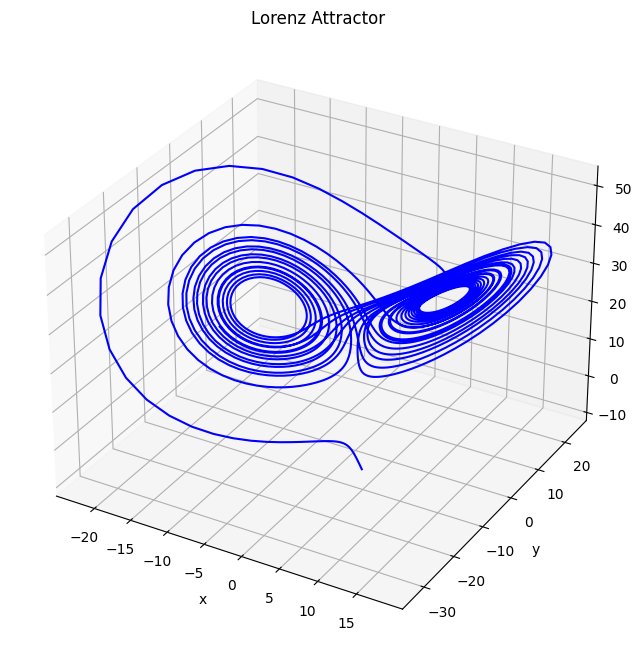

In [9]:
# initialize the initial conditions and time values
x0, y0, z0 = np.random.uniform(-15, 15, 3)
t = np.linspace(0, 25, 2000)
sol = solve_ivp(lorenz, (0, 25), (x0, y0, z0), t_eval=t)

# set plot parameters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], 'b-')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Lorenz Attractor')
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

/tmp/ipykernel_7897/2190866150.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(sol.y[0], sol.y[1], sol.y[2], 'b-', c=color)


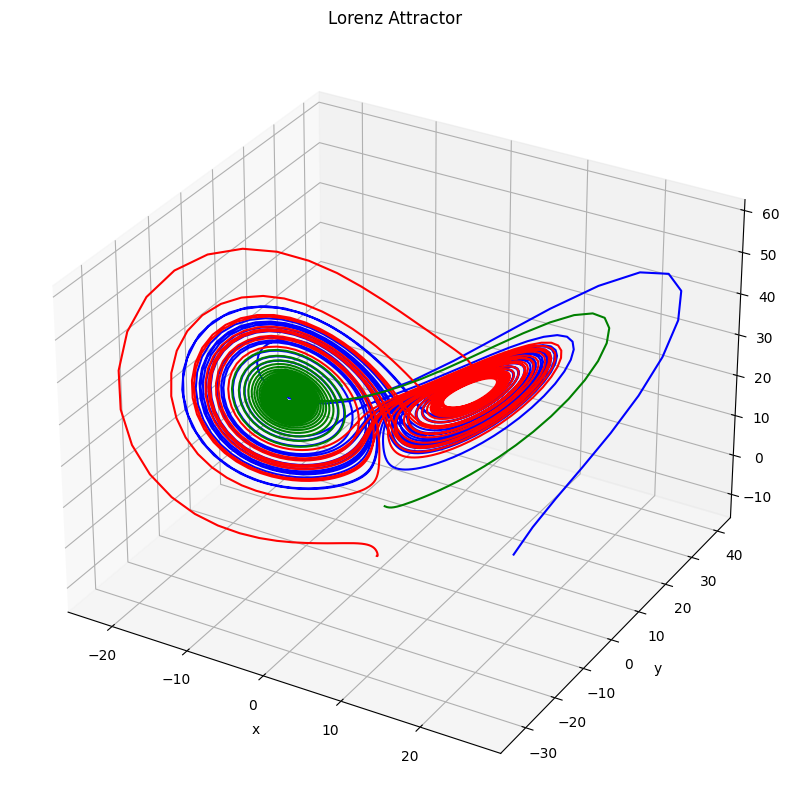

In [5]:
# initialize the initial conditions and time values
t = np.linspace(0, 25, 2000)
init_con = [np.random.uniform(-15, 15, 3) for i in range(3)]
sols = [solve_ivp(lorenz, (0, 25), i, t_eval=t) for i in init_con]
colors = ['b', 'r', 'g']

# set plot parameters
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Lorenz Attractor')

# plot the solutions
for sol, color in zip(sols, colors):
    ax.plot(sol.y[0], sol.y[1], sol.y[2], 'b-', c=color)
plt.show()

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4` and embed it into the notebook.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [ ]:
# Initialize the initial conditions and time values
x0 = np.random.uniform(-15, 15, 3)
x1 = x0 + np.random.randn(3)*(1e-3)
end = 50
t_span = (0, end)
t_eval = np.linspace(0, end, 3000)

# Compute the solutions
sol1 = solve_ivp(lorenz, t_span, x0, t_eval=t_eval)
sol2 = solve_ivp(lorenz, t_span, x1, t_eval=t_eval)

# Set plot parameters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-30, 30))
ax.set_ylim((-40, 40))
ax.set_zlim((-20, 60))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Initialize points and lines
point1, = plt.plot([],[],[], marker='o', c='b')
line1, = plt.plot([],[],[], alpha=0.5, c='b')
point2, = plt.plot([],[],[], marker='o', c='g')
line2, = plt.plot([],[],[], alpha=0.5, c='g')

# Update 
def update(i):
    point1.set_data([sol1.y[0, i]], [sol1.y[1, i]])
    point1.set_3d_properties([sol1.y[2, i]])
    point2.set_data([sol2.y[0, i]], [sol2.y[1, i]])
    point2.set_3d_properties([sol2.y[2, i]])

    line1.set_data(sol1.y[0, :i], sol1.y[1, :i])
    line1.set_3d_properties(sol1.y[2, :i])
    line2.set_data(sol2.y[0, :i], sol2.y[1, :i])
    line2.set_3d_properties(sol2.y[2, :i])

    # Return
    # return [point1, line1], [point2, line2]

plt.title("Lorenz Attractor")
plt.legend()

# Save the animation
anim = animation.FuncAnimation(fig, update, frames=range(len(sol1.y[0])), interval=9)
anim.save('/mnt/c/Users/dalli/source/acme_senior/vl4labs/LorenzEquations/lorenz_animation1.mp4')

<video src="lorenz_animation1.mp4" controls>

## Problem 4
The `solve_ivp` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the `solve_ivp` arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4` and embed it into the notebook.

In [ ]:
# Initialize the initial conditions and time values
x0 = np.random.uniform(-15, 15, 3)
end = 50
t_span = (0, end)
t_eval = np.linspace(0, end, 3000)

# Compute the solutions
sol1 = solve_ivp(lorenz, t_span, x0, t_eval=t_eval, atol=1e-15, rtol=1e-13)
sol2 = solve_ivp(lorenz, t_span, x0, t_eval=t_eval, atol=1e-12, rtol=1e-10)

# Set plot parameters
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-30, 30))
ax.set_ylim((-40, 40))
ax.set_zlim((-20, 60))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Initialize points and lines
point1, = plt.plot([],[],[], marker='o', c='b')
line1, = plt.plot([],[],[], alpha=0.5, c='b')
point2, = plt.plot([],[],[], marker='o', c='g')
line2, = plt.plot([],[],[], alpha=0.5, c='g')

# Update 
def update(i):
    point1.set_data([sol1.y[0, i]], [sol1.y[1, i]])
    point1.set_3d_properties(sol1.y[2, i])
    point2.set_data([sol2.y[0, i]], [sol2.y[1, i]])
    point2.set_3d_properties(sol2.y[2, i])

    line1.set_data(sol1.y[0, :i], sol1.y[1, :i])
    line1.set_3d_properties(sol1.y[2, :i])
    line2.set_data(sol2.y[0, :i], sol2.y[1, :i])
    line2.set_3d_properties(sol2.y[2, :i])

    # Return
    return [point1, line1], [point2, line2]

plt.title("Lorenz Attractor")
plt.legend()

# Save the animation
anim = animation.FuncAnimation(fig, update, frames=range(len(sol1.y[0])), interval=9)
anim.save('/mnt/c/Users/dalli/source/acme_senior/vl4labs/LorenzEquations/lorenz_animation2.mp4')

<video src="lorenz_animation2.mp4" controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `solve_ivp` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Print your approximation of $\lambda$, and produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

Approximate Lyapunov exponent: 0.45195909765433956


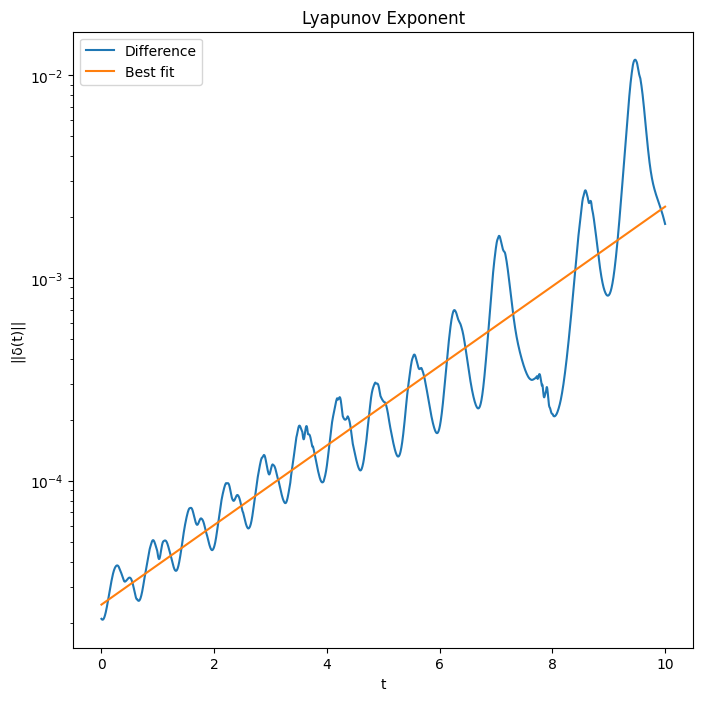

In [10]:
# create initial conditions
x0 = solve_ivp(lorenz, (0, 5), np.random.uniform(-15,15,3), max_step=0.1).y[:,-1]
x1 = x0 + np.random.randn(3)*(1e-5)

# initialize parameters
t_span = (0, 10)
t_eval = np.linspace(0, 10, 10000)

# solve
sol1 = solve_ivp(lorenz, t_span, x0, t_eval=t_eval)
sol2 = solve_ivp(lorenz, t_span, x1, t_eval=t_eval)

dif = np.linalg.norm(sol1.y - sol2.y, axis=0)

# Use scipy.stats.linregress to calculate a best-fit line for log(∥δ(t)∥) against t.
slope, intercept = linregress(t_eval, np.log(dif))[:2]
print(f"Approximate Lyapunov exponent: {slope}")

# plot
plt.figure(figsize=(8, 8))
plt.semilogy(t_eval, dif, label='Difference')
plt.semilogy(t_eval, np.exp(slope*t_eval + intercept), label='Best fit')
plt.xlabel('t')
plt.ylabel('||δ(t)||')
plt.title('Lyapunov Exponent')
plt.legend()
plt.show()